In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [31]:
train_df = pd.read_csv("C:/Users/gaura/Desktop/DL/fashion-mnist_train.csv")
test_df = pd.read_csv("C:/Users/gaura/Desktop/DL/fashion-mnist_test.csv")

In [32]:
train_df.shape

(60000, 785)

In [33]:
test_df.shape

(10000, 785)

In [34]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [35]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [38]:
y_train = train_df.iloc[:,0].to_numpy()

In [39]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [40]:
y_test = test_df.iloc[:,0].to_numpy()

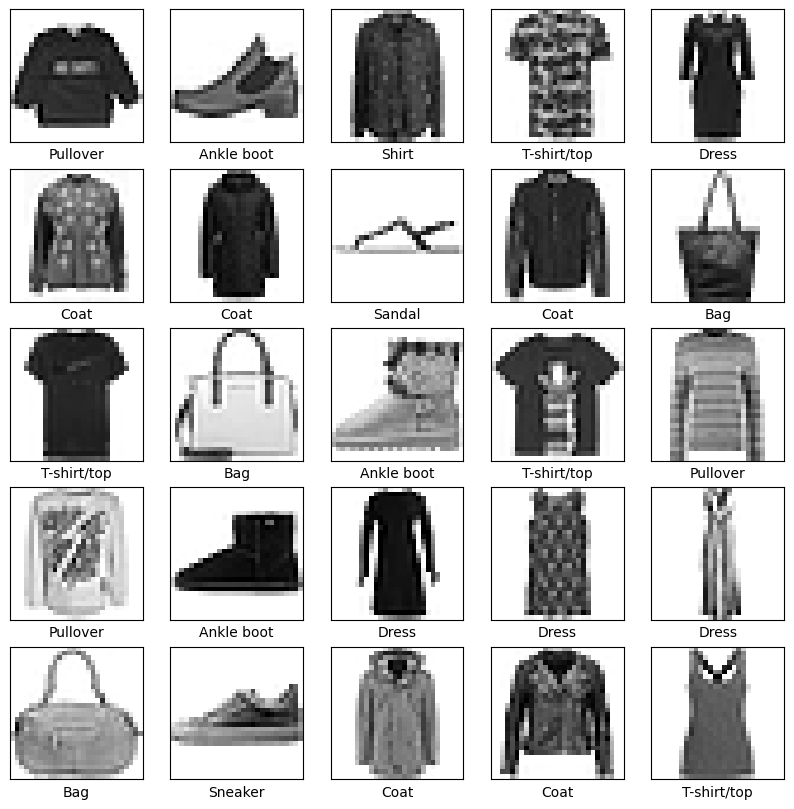

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout


In [43]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

C:\Users\gaura\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         346,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.5711 - loss: 1.3299 - val_accuracy: 0.8000 - val_loss: 0.5603
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.8167 - loss: 0.5178 - val_accuracy: 0.8447 - val_loss: 0.4518
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8477 - loss: 0.4369 - val_accuracy: 0.8630 - val_loss: 0.4131
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8619 - loss: 0.3980 - val_accuracy: 0.8713 - val_loss: 0.3783
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8728 - loss: 0.3657 - val_accuracy: 0.8787 - val_loss: 0.3549
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8794 - loss: 0.3470 - val_accuracy: 0.8800 - val_loss: 0.3461
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8824 - loss: 0.3367 - val_accuracy: 0.8877 - val_loss: 0.3365
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.8873 - loss: 0.3178 - val_accuracy: 0

In [49]:
evaluation = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9138 - loss: 0.2389


In [50]:
print(f"Accuracy: {evaluation[1]}")


Accuracy: 0.9197999835014343


In [51]:
y_probas = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [52]:
y_pred = y_probas.argmax(axis=-1)

In [53]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

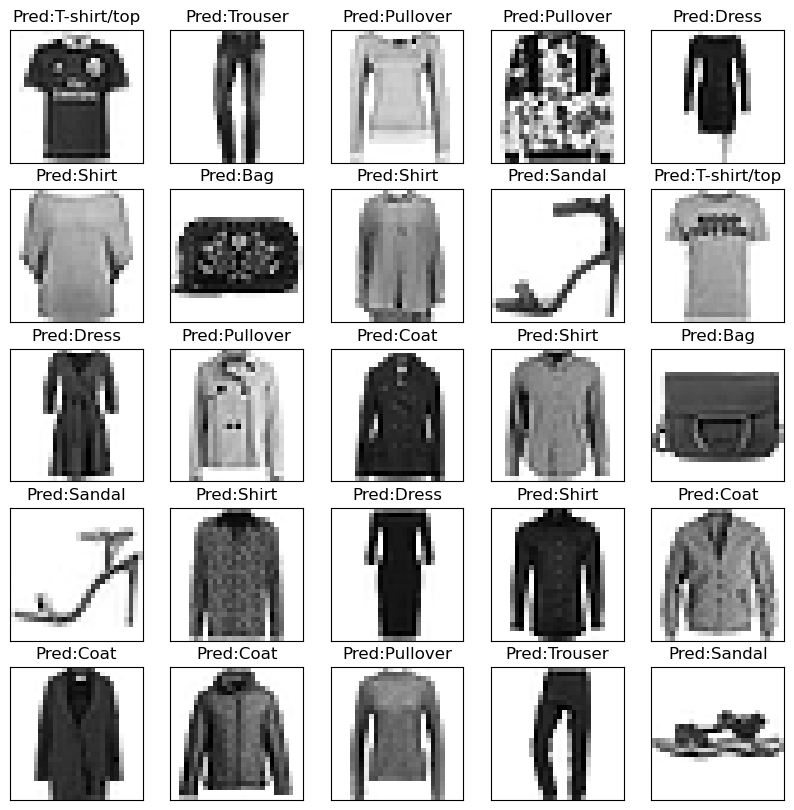

In [54]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [55]:
from sklearn.metrics import classification_report


In [56]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.84      0.90      0.87      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.91      0.86      0.88      1000
     class 3       0.93      0.92      0.92      1000
     class 4       0.89      0.88      0.88      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.77      0.78      0.77      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

